# Introduction to NLP Fundementals in TensorFlow

In [1]:
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [2]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

2024-09-04 09:05:21.811703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 09:05:21.997472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 09:05:22.064312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 09:05:22.448992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 09:05:25.207213: W tensorflow/compiler/tf2

## Get a text dataset

In [3]:
#!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

In [4]:
#unzip_data('nlp_getting_started.zip')

## Visualizing a text dataset

In [5]:
import pandas as pd

train_df= pd.read_csv('train.csv')
test_df= pd.read_csv('test.csv')

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [8]:
# Shuffle training dataframe
train_df_shuffled= train_df.sample(frac=1, )
train_df_shuffled.head()

,id,keyword,location,text,target
1277,1840,burned,"Gainesville, FL",burned 129 calories doing 24 minutes of Walkin...,1
190,269,ambulance,NaN,http://t.co/FCqmKFfflW Twelve feared killed in...,1
4804,6837,loud%20bang,Kenya,daviesmutia: Breaking news! Unconfirmed! I jus...,1
6803,9746,tragedy,"Noida, NCR, India",Rly tragedy in MP: Some live to recount horror...,1
6488,9276,sunk,New York,Aquarium Ornament Wreck Sailing Boat Sunk Ship...,1


In [9]:
# How does the test dataset looks like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [11]:
pd.Series(train_df.target).value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [12]:
len(train_df), len(test_df)

(7613, 3263)

In [13]:
10876*30/100

3262.8

In [14]:
# Visualize some random samples
import random
random_index= random.randint(0,len(train_df)-6)

for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    index,text,target= row
    print(f'Index: {index}\n'
          f'Text: {text}\n'
          f'Target: {target}', '(real disaster)' if target>0 else '(note real disaster)' )
    print()
    print('----\n')

Index: 4623
Text: incident with injury:I-495  inner loop Exit 31 - MD 97/Georgia Ave Silver Spring
Target: 1 (real disaster)

----

Index: 6943
Text: I feel so lucky rn
Target: 0 (note real disaster)

----

Index: 3836
Text: After shooting event at the theater @Starbucks is giving FREE COFFEE to all first responders police &amp; firefighters. AntiochHickoryHollow#TN
Target: 1 (real disaster)

----

Index: 2140
Text: [Comment] Deaths of older children: what do the data tell #US? http://t.co/p8Yr2po6Jn
 #nghlth
Target: 1 (real disaster)

----

Index: 975
Text: One day this heart gone get me zipped up in a body bag.
Target: 0 (note real disaster)

----



## Split data into training and validation sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_text, validation_text, train_labels, validation_labels= train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                               train_df_shuffled['target'].to_numpy(),
                                                                               test_size=0.1,
                                                                               shuffle=True,
                                                                               stratify=train_df_shuffled.target)

In [17]:
len(train_text)

6851

In [18]:
7613*9/10

6851.7

In [19]:
len(validation_text)

762

In [20]:
7613*1/10

761.3

In [21]:
pd.Series(train_labels).value_counts()

0    3907
1    2944
Name: count, dtype: int64

In [22]:
pd.Series(validation_labels).value_counts()

0    435
1    327
Name: count, dtype: int64

In [23]:
train_text[:10], train_labels[:10]

(array(['I reject the laws of the misguided false prophets imprison nations fueling self annihilation',
        '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4',
        "in BOTH 'peacetime and times of national emergency.'",
        'Burford. What a catastrophe! Traffic and big lorries. No action as usual from Council.',
        '@_itsdanie_ noooo?? I almost drowned you once tho :))))',
        'I think that none of us know the impact we have on the lives of those around us. Even the slightest stirring can create a violent storm.',
        'DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'You must be annihilated!',
        'Photo: Sketch I did based on the A Taste of Armageddon episode of #startrek #tos http://t.co/a2e6dcsk88',
        'People are more worried about the burning of buildings than black people l

In [24]:
validation_text[:10], validation_labels[:10]

(array(["'imagine an entire aisle dedicated to making people look like serbian refugees.' - director of whole foods clothing section",
        '@TexansDC @kylekrenek @Zepp1978 @Frobeus_NS Never thought I could have that much fun saving (and shooting) teddy bear hostages. lol',
        'Tunisia beach massacre linked to March terror attack on museum http://t.co/kuRqLxFiHL',
        '#MeditationByMSG 45600 ppl got method of meditation in U.P &amp;got deluge of divine blessing 4 happy n peaceful life. http://t.co/VMf5LnxVzC',
        'Read ~ THE UNHEALED WOUNDS OF AN UNENDING CONFLICT #Kashmir #Pakistan #India http://t.co/sAF9MoSkSN #EndOccupation #EndConflict #FreeKashmir',
        'World Class Tgirl Ass 02 - Scene 4 - Pandemonium http://t.co/iwCu3DgI1a',
        '@SaintRobinho86 someone has to be at the bottom of every league. Tonight clearly demonstrated why the Lions are where they are - sunk!',
        'Typhoon Soudelor taking dead aim at Taiwan http://t.co/sA5CDWVDXt',
        '@LA_S

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:

- Tokenziation - direct mapping of token (a token could be a word or a character) to number
- Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text Vectorization (Tokenization)


In [25]:
train_text[:5]

array(['I reject the laws of the misguided false prophets imprison nations fueling self annihilation',
       '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4',
       "in BOTH 'peacetime and times of national emergency.'",
       'Burford. What a catastrophe! Traffic and big lorries. No action as usual from Council.',
       '@_itsdanie_ noooo?? I almost drowned you once tho :))))'],
      dtype=object)

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [27]:
# Use the default TextVectorization parameters
text_vectorizer= TextVectorization(max_tokens=None,
                                  standardize= 'lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=None , # create groups of n-words?
                                  output_mode='int', # how to map tokens to numbers
                                  output_sequence_length=None, # length of sequences
                                  pad_to_max_tokens=False # padding with zeros
                                  )

2024-09-04 09:08:02.632601: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
# Find the average number of tokens (words) in the training tweets
(train_text[0].split())

['I',
 'reject',
 'the',
 'laws',
 'of',
 'the',
 'misguided',
 'false',
 'prophets',
 'imprison',
 'nations',
 'fueling',
 'self',
 'annihilation']

In [29]:
len(train_text[0].split())

14

In [30]:
sum([len(i.split()) for i in train_text])

102130

In [31]:
round(sum([len(i.split()) for i in train_text])/len(train_text))

15

In [34]:
# Setup text vectorization variables
max_vocab_length=10000 # max number of words to have in our vocabulary
max_length= 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer= TextVectorization(max_tokens= max_vocab_length,
                                  output_sequence_length=max_length,
                                  output_mode='int'
                                  )

In [35]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_text)

In [36]:
# Create a sample sentence and tokenize it
sample_sentence= "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[305,   3, 216,   4,  13, 760,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [37]:
random_sentence= random.choice(train_text)
sample_sentence=text_vectorizer([random_sentence])

print(f'Original text: {random_sentence}\
     \n\nVectorized: {sample_sentence}')

Original text: @nxwestmidlands huge fire at Wholesale markets ablaze http://t.co/rwzbFVNXER     

Vectorized: [[   1  946   43   17 2625 2054  575    1    0    0    0    0    0    0
     0]]


In [38]:
# Get the unique words in the vocabulary
len(text_vectorizer.get_vocabulary()) # get the number of unique word of adapted train_text

10000

In [39]:
# Top 10 most common words
text_vectorizer.get_vocabulary()[:10] # UNK means unknown OOV words like @KushWush

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [40]:
# Top 10 least common words
text_vectorizer.get_vocabulary()[-10:]

['paddytomlinson1',
 'padded',
 'pada',
 'pact',
 'pacquiao',
 'packåÊfor',
 'packing',
 'packed',
 'packages',
 'package']

In [41]:
train_text

array(['I reject the laws of the misguided false prophets imprison nations fueling self annihilation',
       '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4',
       "in BOTH 'peacetime and times of national emergency.'", ...,
       "#BREAKING: there was a deadly motorcycle car accident that happened to #Hagerstown today. I'll have more details at 5 @Your4State. #WHAG",
       "Cramer: Iger's 3 words that wrecked Disney's stock http://t.co/3G79prAyYc #cnbc #topnews",
       "BREAKING: Fairfax County firefighter placed on admin leave amid probe into Facebook post about putting police in 'body bags' dept. says."],
      dtype=object)

### Creating an Embedding using an Embedding Layer

The main parameters we're concerned about here are:

- `input_dim` - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
- `output_dim` - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
- `embeddings_initializer` - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
- `input_length` - Length of sequences being passed to embedding layer.

In [42]:
from tensorflow.keras.layers import Embedding

In [43]:
embedding= Embedding(input_dim=max_vocab_length, # input shape
                    output_dim=128)

embedding

<Embedding name=embedding, built=False>

In [44]:
random_sentence= random.choice(train_text)
print(f'Original text: {random_sentence}\
     \n\nEmbedded version:')
sample_embedded= embedding(text_vectorizer([random_sentence]))
sample_embedded

Original text: @Beyonce @NicoleKidman @Oprah these money grubbing kikes need to get a clueI have no money but I can still destroy with telekinesis. Watch.     

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00916199, -0.01709632, -0.00275398, ...,  0.02622921,
         -0.02009755, -0.00588588],
        [ 0.00392144,  0.00227902, -0.04440103, ...,  0.01327305,
         -0.00735395, -0.02185297],
        [ 0.00392144,  0.00227902, -0.04440103, ...,  0.01327305,
         -0.00735395, -0.02185297],
        ...,
        [ 0.02745375, -0.04608775,  0.03099072, ...,  0.01119226,
          0.04150672,  0.01549451],
        [-0.01606032,  0.0350627 ,  0.03981048, ..., -0.0487055 ,
         -0.02004784, -0.0234781 ],
        [-0.00894537, -0.00965849,  0.04180219, ..., -0.03002828,
          0.04034113,  0.04106509]]], dtype=float32)>

In [46]:
sample_embedded[0][0], sample_embedded[0][0].shape, random_sentence.split()[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00916199, -0.01709632, -0.00275398, -0.03249993,  0.03995847,
         0.04667213,  0.01574345, -0.01333674, -0.02370766,  0.04444048,
         0.02933464, -0.0395723 ,  0.01343669,  0.02054569,  0.02955539,
        -0.02141718, -0.0009114 , -0.01750863, -0.02490218, -0.04639156,
         0.00238639, -0.02090951, -0.00657864,  0.00307859, -0.03478419,
        -0.04175762, -0.03025606, -0.02182146, -0.03202535,  0.04011886,
         0.00304384, -0.00693884, -0.03827232,  0.04464057, -0.03841256,
        -0.03900301, -0.01753778,  0.0247939 ,  0.02621417,  0.00782905,
        -0.04314969,  0.01410048,  0.0240628 ,  0.03353748,  0.00720219,
        -0.03775312,  0.02617424, -0.00881231, -0.03196476,  0.02535014,
         0.04217154,  0.00503231, -0.01072485, -0.03956891,  0.04177896,
         0.03980594,  0.00298698, -0.02765002, -0.03064868, -0.00729383,
         0.04423043,  0.0435351 , -0.00170604, -0.00267279,  0.01378999,
  

## Modelling a text dataset (running a series of experiments)

- **Model 0**: Naive Bayes (baseline)
- **Model 1**: Feed-forward neural network (dense model)
- **Model 2**: LSTM model
- **Model 3**: GRU model
- **Model 4**: Bidirectional-LSTM model
- **Model 5**: 1D Convolutional Neural Network
- **Model 6**: TensorFlow Hub Pretrained Feature Extractor
- **Model 7**: Same as model 6 with 10% of training data

Each experiment will go through the following steps:

* Construct a model
* Build the model
* Fit the model
* Evaluate the model


### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [48]:
# Create tokenization and modeling pipeline
model_0= Pipeline([
        ('tfidf',TfidfVectorizer()), # convert words to numbers
        ('clf', MultinomialNB()), # model the text
])

# Fit the pipeline to training data
model_0.fit(train_text, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [49]:
# Evaluate our baseline model
model_0_score= model_0.score(validation_text, validation_labels)
print(f'Model 0 achieves an accuracy of:{model_0_score}')

Model 0 achieves an accuracy of:0.8018372703412073


In [50]:
# Make predictions
model_0_preds= model_0.predict(validation_text)
model_0_preds[:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(validation_labels,model_0_preds)

0.8018372703412073

### Creating an evaluation function for our model experiments
We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

- Accuracy
- Precision
- Recall
- F1-score

In [52]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    
    """
    accuracy= accuracy_score(y_true, y_pred)
    precision, recall, f1, _= precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    results= {'accuracy':accuracy,
             'precision':precision,
             'recall':recall,
             'f1':f1}
    
    return results

In [69]:
# Get baseline results
model_0_results_= calculate_results(y_true= validation_labels, y_pred= model_0_preds)
model_0_results_

{'accuracy': 0.8018372703412073,
 'precision': 0.8126421697287839,
 'recall': 0.8018372703412073,
 'f1': 0.7956417064028612}

### Model 1: A simple dense model

In [54]:
from helper_functions import create_tensorboard_callback

In [56]:
# Build modek with the Functional API
from tensorflow.keras import layers

inputs= layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimentional strings
x= text_vectorizer(inputs) # turn the input text into numbers
x= embedding(x) # turn the numbers into embedding
x= layers.GlobalAveragePooling1D()(x) # condense the feature vector
#x= layers.GlobalMaxPooling1D()(x)
outputs= layers.Dense(1, activation='sigmoid')(x)
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [57]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [59]:
# Fit the model
model_1_history= model_1.fit(x= train_text,
                            y= train_labels,
                            epochs=5,
                            validation_data=(validation_text, validation_labels),
                            callbacks=[create_tensorboard_callback(dir_name='TensorBoard_logs',
                                                                  experiment_name='model_1_dense')])

Saving TensorBoard log files to: TensorBoard_logs/model_1_dense/20240904-091535
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6435 - loss: 0.6474 - val_accuracy: 0.7638 - val_loss: 0.5337
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8209 - loss: 0.4656 - val_accuracy: 0.7887 - val_loss: 0.4704
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8629 - loss: 0.3586 - val_accuracy: 0.7979 - val_loss: 0.4538
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8873 - loss: 0.2946 - val_accuracy: 0.7940 - val_loss: 0.4431
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9141 - loss: 0.2405 - val_accuracy: 0.7953 - val_loss: 0.4572


In [60]:
len(train_text)/32

214.09375

In [61]:
# Check the results
model_1_results= model_1.evaluate(validation_text, validation_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8097 - loss: 0.4230 


In [62]:
# Make some predictions
model_1_pred_probs= model_1.predict(validation_text)
model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.50216067],
       [0.15177532],
       [0.94383055],
       [0.31585196],
       [0.6807966 ],
       [0.13753873],
       [0.10607041],
       [0.9782193 ],
       [0.29569644],
       [0.61101323]], dtype=float32)

In [63]:
model_1_pred_probs.shape

(762, 1)

In [64]:
# Convert predictions probabilities into label format
model_1_preds= tf.squeeze(tf.round(model_1_pred_probs))

In [65]:
model_1_preds.shape

TensorShape([762])

In [66]:
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1.], dtype=float32)>

In [67]:
# Calculate the model_1 metrics
model_1_results_= calculate_results(validation_labels, model_1_preds)
model_1_results_

{'accuracy': 0.7952755905511811,
 'precision': 0.7946426549882092,
 'recall': 0.7952755905511811,
 'f1': 0.7940079967113983}

In [70]:
model_0_results_

{'accuracy': 0.8018372703412073,
 'precision': 0.8126421697287839,
 'recall': 0.8018372703412073,
 'f1': 0.7956417064028612}

In [71]:
import numpy as np
np.array(list(model_1_results_.values())) > np.array(list(model_0_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [72]:
# Get the vocabulary from the text vectorization layer
words_in_vocab= text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [75]:
# Get the weight matrix of embedding layer
# These are the numerical representations of each token in the training data, which have been learned for ~5 epochs

embedding_weights= model_1.get_layer('embedding').get_weights()[0]

In [76]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [77]:
model_1.weights

[<KerasVariable shape=(10000, 128), dtype=float32, path=embedding/embeddings>,
 <KerasVariable shape=(128, 1), dtype=float32, path=dense/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=dense/bias>]

In [78]:
model_1.layers[2].weights

[<KerasVariable shape=(10000, 128), dtype=float32, path=embedding/embeddings>]

In [80]:
model_1.get_layer('embedding').weights

[<KerasVariable shape=(10000, 128), dtype=float32, path=embedding/embeddings>]

In [81]:
embedding_weights.shape

(10000, 128)

In [82]:
embedding_weights[0][0]

0.047885746

In [83]:
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
    if index == 0:
        continue  # skip 0, it's padding.
    vec = embedding_weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

In [84]:
vec.shape

(128,)

In [85]:
len([str(x) for x in vec])

128

In [86]:
('\t'.join([str(x) for x in vec]) + "\n")

'0.07040447\t0.048973095\t-0.071903795\t0.038673185\t-0.100560255\t-0.08524825\t0.041327637\t-0.018398512\t-0.06709299\t-0.07617951\t-0.063572496\t-0.013905979\t0.07764429\t-0.015811628\t0.0513054\t-0.10713541\t0.08914578\t-0.07988226\t-0.078477696\t-0.019105729\t0.049943447\t-0.07788867\t-0.021010082\t0.10428631\t0.086613655\t-0.023879344\t-0.021523412\t-0.07851389\t0.021755824\t-0.06158633\t-0.019080091\t-0.04166972\t0.013520193\t0.037919324\t-0.015686776\t0.022007266\t-0.100690484\t-0.0960631\t-0.07548437\t-0.08754341\t-0.058350638\t-0.08954109\t-0.027851805\t-0.08750382\t0.022697426\t-0.08285125\t-0.08709254\t-0.052818082\t0.061832894\t-0.07786203\t0.03514416\t-0.05050756\t0.0891293\t0.07891785\t0.050627597\t-0.10082665\t0.036317226\t0.05994022\t-0.023828631\t0.02940944\t-0.050325014\t0.028580612\t0.039051626\t0.08326669\t0.030361714\t-0.03187359\t-0.056884784\t0.035216063\t0.10374331\t-0.034520313\t-0.08620771\t-0.07997122\t-0.078567766\t-0.11086505\t-0.05558961\t0.019189117\t0.09

In [87]:
'aa'.join('bbb')

'baabaab'

We can visualizeembeddings in: [TensorFlow Projector](https://projector.tensorflow.org/)

## Recurrent Neural Networks (RNN's)

>📖 **Resources**:
>- [MIT Deep Learning Lecture on Recurrent Neural Networks](https://youtu.be/SEnXr6v2ifU) - explains the background of recurrent neural networks and introduces LSTMs.
>- [The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) - demonstrates the power of RNN's with examples generating various sequences.
>- [Understanding LSTMs by Chris Olah](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

### Model2: LSTM
LSTM = Long Short Term Memory (one of the most popular LSTM cells)

`
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/Dense) -> Output (label probability)
`

In [120]:
# Create an LSTM model
import tensorflow.keras.layers

embedding_model_2= Embedding(input_dim=max_vocab_length, # input shape
                            output_dim=128)
                    

inputs= layers.Input(shape=(1,), dtype='string')
x= text_vectorizer(inputs)
x= embedding_model_2(x)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x= layers.LSTM(64, return_sequences=False)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs= layers.Dense(1, activation='sigmoid')(x)
model_2= tf.keras.Model(inputs, outputs, name='model_2_lstm')

>🔑 **Note**: The reason we use a new embedding layer for each model is since the embedding layer is a learned representation of words (as numbers), if we were to use the same embedding layer (embedding_1) for each model, we'd be mixing what one model learned with the next. And because we want to compare our models later on, starting them with their own embedding layer each time is a better idea.

In [121]:
model_2.summary()

Model: "model_2_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [123]:
# Fit the model
model_2_history= model_2.fit(x=train_text,
                            y=train_labels,
                            epochs=5,
                            validation_data=(validation_text, validation_labels),
                            callbacks=[create_tensorboard_callback(dir_name='TensorBoard_logs',
                                                                  experiment_name='model_2_lstm')])

Saving TensorBoard log files to: TensorBoard_logs/model_2_lstm/20240904-105906
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6757 - loss: 0.5854 - val_accuracy: 0.7966 - val_loss: 0.4405
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8800 - loss: 0.3066 - val_accuracy: 0.7756 - val_loss: 0.5111
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9237 - loss: 0.2133 - val_accuracy: 0.7664 - val_loss: 0.5250
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9452 - loss: 0.1552 - val_accuracy: 0.7572 - val_loss: 0.6821
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9656 - loss: 0.1036 - val_accuracy: 0.7598 - val_loss: 0.6605


In [128]:
model_2_results= model_2.evaluate(validation_text, validation_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7666 - loss: 0.6413


In [129]:
model_2_pred_probs= model_2.predict(validation_text)
model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([[0.27280793],
       [0.02597044],
       [0.99846274],
       [0.05300075],
       [0.05430886],
       [0.01397035],
       [0.02242682],
       [0.99883074],
       [0.3222111 ],
       [0.26272172]], dtype=float32)

In [130]:
model_2_preds= tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [131]:
model_2_results_= calculate_results(validation_labels, model_2_preds)
model_2_results_

{'accuracy': 0.7598425196850394,
 'precision': 0.7587120011701324,
 'recall': 0.7598425196850394,
 'f1': 0.7586890034552086}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

The architecture of the GRU-powered model will follow the same structure we've been using:

`Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)`

Again, the only difference will be the layer(s) we use between the embedding and the output.


In [195]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers

embedding_model_3= layers.Embedding(input_dim= max_vocab_length,
                                   output_dim= 128)

inputs=layers.Input(shape=(1,), dtype='string')
x= text_vectorizer(inputs)
x= embedding_model_3(x)
#x= layers.GRU(64, return_sequences=True)(x) # stacking recurrent cells requires return_sequences=True
#x= layers.GRU(64, return_sequences=True)(x)
x= layers.GRU(64, return_sequences=False)(x)
#x= layers.Dense(64, activation='relu')(x)
outputs= layers.Dense(1, activation='sigmoid')(x)
model_3= tf.keras.Model(inputs, outputs, name='model_3_gru')

In [196]:
model_3.summary()

Model: "model_3_gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_24 (Embedding)        │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_44 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [197]:
# Compile the model 3
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [198]:
# Fit the model 3
model_3_history= model_3.fit(x=train_text,
                            y=train_labels,
                            epochs=5,
                            validation_data=(validation_text, validation_labels),
                            callbacks=[create_tensorboard_callback(dir_name='TensorBoard_logs',
                                                                  experiment_name='model_3_gru')])

Saving TensorBoard log files to: TensorBoard_logs/model_3_gru/20240904-153251
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6497 - loss: 0.6042 - val_accuracy: 0.8071 - val_loss: 0.4487
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8647 - loss: 0.3227 - val_accuracy: 0.7808 - val_loss: 0.4717
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9230 - loss: 0.2067 - val_accuracy: 0.7664 - val_loss: 0.5088
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9559 - loss: 0.1385 - val_accuracy: 0.7520 - val_loss: 0.6779
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9606 - loss: 0.1196 - val_accuracy: 0.7493 - val_loss: 0.7150


In [199]:
model_3_results= model_3.evaluate(validation_text, validation_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7555 - loss: 0.6689


In [200]:
model_3_pred_probs= model_3.predict(validation_text)
model_3_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[0.8786302 ],
       [0.07249766],
       [0.99704266],
       [0.08179193],
       [0.7337269 ],
       [0.01819964],
       [0.02147148],
       [0.9983107 ],
       [0.50955117],
       [0.6152521 ]], dtype=float32)

In [201]:
model_3_preds= tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 1., 0., 0., 1., 1., 1.], dtype=float32)>

In [202]:
model_3_results_= calculate_results(validation_labels, model_3_preds)
model_3_results_


{'accuracy': 0.7493438320209974,
 'precision': 0.7496444099790557,
 'recall': 0.7493438320209974,
 'f1': 0.7494824451868386}

### Model 4: Bidirectional RNN

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

In [204]:
# Create the model
import tensorflow.keras.layers

embedding_model_4= layers.Embedding(input_dim=max_vocab_length,
                                   output_dim=128)

inputs= layers.Input(shape=(1,), dtype='string')
x= text_vectorizer(inputs)
x= embedding_model_4(x)
x= layers.Bidirectional(layer= layers.LSTM(64))(x)
outputs= layers.Dense(1, activation='sigmoid')(x)
model_4= tf.keras.Model(inputs, outputs, name='model_4_bidirectional')

In [205]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_26 (Embedding)        │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [206]:
# Compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [207]:
# Fit the model
model_4_history= model_4.fit(train_text,
                            train_labels,
                            epochs=5,
                            validation_data=(validation_text, validation_labels),
                            callbacks=[create_tensorboard_callback(dir_name='TensorBoard_logs',
                                                                  experiment_name='model_4_bidirectional')])

Saving TensorBoard log files to: TensorBoard_logs/model_4_bidirectional/20240904-160750
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.6702 - loss: 0.5800 - val_accuracy: 0.7940 - val_loss: 0.4417
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8638 - loss: 0.3213 - val_accuracy: 0.7743 - val_loss: 0.4988
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9239 - loss: 0.2072 - val_accuracy: 0.7585 - val_loss: 0.5457
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9497 - loss: 0.1490 - val_accuracy: 0.7546 - val_loss: 0.6070
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9649 - loss: 0.1007 - val_accuracy: 0.7625 - val_loss: 0.6956


In [211]:
model_4_results= model_4.evaluate(validation_text, validation_labels)
model_4_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.6727


[0.6956226229667664, 0.7624672055244446]

In [220]:
model_4_pred_probs= model_4.predict(validation_text)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[0.7825118 ],
       [0.00637318],
       [0.99883926],
       [0.03025372],
       [0.15447316],
       [0.03803952],
       [0.01418898],
       [0.9990202 ],
       [0.5198989 ],
       [0.9391436 ]], dtype=float32)

In [224]:
model_4_preds= tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1.], dtype=float32)>

In [226]:
model_4_results_= calculate_results(validation_labels, model_4_preds)
model_4_results_

{'accuracy': 0.7624671916010499,
 'precision': 0.7619233107385899,
 'recall': 0.7624671916010499,
 'f1': 0.7621302026902782}

## Convolutional Neural Networks for Text

A typical CNN architecture for sequences will look like the following:

`Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)`

### Model 5: Conv1D

In [254]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test= layers.Embedding(input_dim= max_vocab_length, output_dim= 128)

tokenizing_test= text_vectorizer(['This is an embedding test'])
embedding_test= embedding_test(tokenizing_test)  # turn target sentence into embedding
conv_1d= layers.Conv1D(32, 5, activation='relu')(embedding_test) # convolve over target sequence 5 words at a time
#conv_1d_output= conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool= layers.GlobalMaxPool1D()(conv_1d)
#max_pool_output= max_pool(conv_1d_output) # get the most important features

In [255]:
embedding_test.shape, conv_1d.shape, max_pool.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [256]:
embedding_test[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.02586454, -0.03081371, -0.03986103, -0.03649056,  0.0455738 ,
        0.00714306, -0.03041916, -0.04155276, -0.03046498, -0.04579787,
        0.00514495,  0.03669615, -0.00295369, -0.04537324,  0.0243125 ,
       -0.01170089,  0.03360811,  0.02107764, -0.04439782, -0.03455216,
        0.01710306, -0.01984509, -0.02374413, -0.03228672, -0.01434052,
        0.03137076,  0.00638716, -0.00451561,  0.02153132,  0.02521849,
        0.03282812,  0.03115559,  0.00262292, -0.00871221, -0.04040301,
       -0.00414089,  0.00827485,  0.0137963 ,  0.02197925,  0.03030271,
        0.03055234, -0.04109057,  0.01674113, -0.00104003, -0.01281568,
       -0.01800216,  0.02006978,  0.03035185,  0.0215399 , -0.0047245 ,
        0.02990694,  0.00417553,  0.01425102,  0.03828428, -0.02144543,
        0.00870763,  0.03599692,  0.03633728,  0.03966172,  0.00216405,
        0.03237047,  0.02536165,  0.04897136, -0.03462065,  0.00553615,
        0.009522

In [257]:
conv_1d[0][0]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.        , 0.        , 0.02292001, 0.01499614, 0.        ,
       0.05666614, 0.        , 0.02965385, 0.        , 0.        ,
       0.03834064, 0.0509617 , 0.0268499 , 0.        , 0.        ,
       0.0438802 , 0.        , 0.02216474, 0.        , 0.00969512,
       0.        , 0.07997873, 0.08008155, 0.        , 0.        ,
       0.        , 0.022925  , 0.        , 0.        , 0.02236961,
       0.        , 0.        ], dtype=float32)>

In [258]:
max_pool[0]

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.04855134, 0.01877292, 0.03219604, 0.01499614, 0.02890041,
       0.08004729, 0.03986488, 0.02965385, 0.02141007, 0.04403553,
       0.04482555, 0.0509617 , 0.061158  , 0.01346205, 0.03454747,
       0.0671977 , 0.03378597, 0.02346367, 0.05115514, 0.05072634,
       0.0237133 , 0.07997873, 0.08008155, 0.        , 0.02274384,
       0.05637973, 0.07601454, 0.03924986, 0.01031367, 0.02236961,
       0.02110671, 0.0176202 ], dtype=float32)>

In [273]:
embedding_model_5= layers.Embedding(input_dim= max_vocab_length, output_dim=128)

inputs=layers.Input(shape=(1,), dtype='string')
x= text_vectorizer(inputs)
x= embedding_model_5(x)
x= layers.Conv1D(64, 5, activation='relu')(x)
x= layers.GlobalMaxPool1D()(x)
outputs= layers.Dense(1, activation='sigmoid')(x)
model_5= tf.keras.Model(inputs, outputs, name='model_5_Conv1D')

In [277]:
model_5.summary()

Model: "model_5_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_2            │ (None, 15)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_43 (Embedding)        │ (None, 15, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 11, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_9          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,963,269 (15.12 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,642,180 (10.08 MB)

In [274]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [709]:
import datetime
model_checkpoint= tf.keras.callbacks.ModelCheckpoint( 'Checkpoints/'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.keras',
                                                    monitor='val_loss',
                                                    save_best_only=False,
                                                    save_weights_only=False,
                                                    save_freq=215)

In [710]:
model_5_history= model_5.fit(train_text,
                            train_labels,
                            epochs=5,
                            validation_data=(validation_text, validation_labels),
                            callbacks=[create_tensorboard_callback(dir_name='TensorBoard_logs',
                                                                  experiment_name='model_5_Conv1D'),
                                      model_checkpoint])

Saving TensorBoard log files to: TensorBoard_logs/model_5_Conv1D/20240905-113824
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9863 - loss: 0.0281 - val_accuracy: 0.7559 - val_loss: 0.9188
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9855 - loss: 0.0298 - val_accuracy: 0.7493 - val_loss: 0.9192
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9875 - loss: 0.0254 - val_accuracy: 0.7520 - val_loss: 0.9182
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9842 - loss: 0.0276 - val_accuracy: 0.7559 - val_loss: 0.9516
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9856 - loss: 0.0261 - val_accuracy: 0.7507 - val_loss: 0.9816


In [278]:
 model_5_pred_probs= model_5.predict(validation_text)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [283]:
model_5_preds= tf.squeeze(tf.round(model_5_pred_probs))


In [282]:
model_5_results_= calculate_results(validation_labels, model_5_preds)
model_5_results_

{'accuracy': 0.7690288713910761,
 'precision': 0.7681314551682927,
 'recall': 0.7690288713910761,
 'f1': 0.7671845407215244}

In [284]:
model_0_results_

{'accuracy': 0.8018372703412073,
 'precision': 0.8126421697287839,
 'recall': 0.8018372703412073,
 'f1': 0.7956417064028612}

### Model 6: TensorFlow Hub Pretrained Sentence Encodert

In [288]:
import tensorflow_hub as hub


In [316]:
# Create an universal-sentence-encoder embedding
USE= hub.load("tensorflow_hub/universal-sentence-encoder/")

In [318]:
use_sample=USE([
              "The quick brown fox jumps over the lazy dog.",
              "I am a sentence for which I would like to get its embedding"])

In [320]:
use_sample.shape

TensorShape([2, 512])

In [329]:
use_sample[0].shape

TensorShape([512])

In [ ]:
# Create a keras layer using the USE pretrained layer from tensorflow hub
sentense_encoder_layer= hub.KerasLayer("tensorflow_hub/universal-sentence-encoder/",
                                      input_shape=[],
                                      dtype='string',
                                      name='USE')

In [357]:
import tf_keras

In [414]:
# Create model using the Sequential API
model_6= tf_keras.Sequential([
    sentense_encoder_layer,
    #USE,
    #tf_keras.layers.Dense(64, activation='relu'),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(1, activation='sigmoid')
], name= 'model_6_USE')




In [415]:
# Compile 
model_6.compile(loss=tf_keras.losses.BinaryCrossentropy(),
               optimizer=tf_keras.optimizers.Adam(),
               metrics=['accuracy'])


In [416]:
# Fit
model_6_history= model_6.fit(train_text,
                            train_labels,
                            epochs=5,
                            validation_data=(validation_text, validation_labels),
                            #callbacks=[create_tensorboard_callback(dir_name='TensorBoard_logs',
                             #                                      experiment_name='model_6_USE')]
                            )

Epoch 1/5
215/215 [==============================] - 4s 11ms/step - loss: 0.4929 - accuracy: 0.7851 - val_loss: 0.4102 - val_accuracy: 0.8241
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4112 - accuracy: 0.8173 - val_loss: 0.4031 - val_accuracy: 0.8255
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3961 - accuracy: 0.8235 - val_loss: 0.3938 - val_accuracy: 0.8333
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3866 - accuracy: 0.8295 - val_loss: 0.3950 - val_accuracy: 0.8320
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3750 - accuracy: 0.8361 - val_loss: 0.3947 - val_accuracy: 0.8255


In [417]:
model_6. summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256863617 (979.86 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [418]:
model_6_pred_probs= model_6.predict(validation_text)

24/24 [==============================] - 1s 7ms/step


In [419]:
model_6_preds= tf.squeeze(tf.round(model_6_pred_probs))
#model_6_preds[:10]

In [420]:
model_6_results_= calculate_results(validation_labels, model_6_preds)
model_6_results_

{'accuracy': 0.8254593175853019,
 'precision': 0.8271948469872117,
 'recall': 0.8254593175853019,
 'f1': 0.8233027541992525}

In [421]:
model_0_results

{'accuracy': 0.8018372703412073,
 'precision': 0.8126421697287839,
 'recall': 0.8018372703412073,
 'f1': 0.7956417064028612}

### Model 7: TF Hub pretrained USE but with 10% of training data

In [514]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ### 

# Create subsets of 10% of training data
# train_10_percent= train_df_shuffled[['text','target']].sample(frac=0.1, random_state=0)
# train_text_10_percent= train_10_percent['text'].to_list()
# train_labels_10_percent= train_10_percent['target'].to_list()


In [516]:
# Making a better dataset split (no data leakage)
train_text_10_percent= train_text[:int(0.1 * len(train_text))]
train_labels_10_percent= train_labels[:int(0.1 * len(train_text))]

In [517]:
len(train_text)

6851

In [519]:
len(train_text_10_percent)

685

In [520]:
len(train_labels_10_percent)

685

In [525]:
pd.Series(train_labels).value_counts()

0    3907
1    2944
Name: count, dtype: int64

In [527]:
pd.Series(train_labels_10_percent).value_counts()

0    393
1    292
Name: count, dtype: int64

In [691]:
import datetime
model_checkpoint= tf.keras.callbacks.ModelCheckpoint( 'Checkpoints'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.keras')

In [692]:
#model_7= tf_keras.models.clone_model(model_6)
model_7= tf_keras.Sequential([
    sentense_encoder_layer,
    #USE,
    #tf_keras.layers.Dense(64, activation='relu'),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(1, activation='sigmoid')
], name= 'model_7_USE')


In [693]:
model_7.compile(loss=tf_keras.losses.BinaryCrossentropy(),
               optimizer=tf_keras.optimizers.Adam(),
               metrics=['accuracy'])


In [695]:
model_7.fit(train_text_10_percent,
           train_labels_10_percent,
           epochs=5,
           validation_data=(validation_text, validation_labels),
           )

Epoch 1/5
22/22 [==============================] - 2s 39ms/step - loss: 0.6638 - accuracy: 0.6788 - val_loss: 0.6208 - val_accuracy: 0.7664
Epoch 2/5
22/22 [==============================] - 0s 16ms/step - loss: 0.5665 - accuracy: 0.7956 - val_loss: 0.5405 - val_accuracy: 0.7887
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4808 - accuracy: 0.8088 - val_loss: 0.4837 - val_accuracy: 0.7992
Epoch 4/5
22/22 [==============================] - 0s 18ms/step - loss: 0.4261 - accuracy: 0.8146 - val_loss: 0.4589 - val_accuracy: 0.8045
Epoch 5/5
22/22 [==============================] - 0s 16ms/step - loss: 0.3882 - accuracy: 0.8336 - val_loss: 0.4490 - val_accuracy: 0.8031


In [531]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_34 (Dense)            (None, 128)               65664     
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256863617 (979.86 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [532]:
model_7_preds= tf.round(model_7.predict(validation_text))


24/24 [==============================] - 1s 8ms/step


In [533]:
model_7_results_= calculate_results(validation_labels, model_7_preds)
model_7_results_

{'accuracy': 0.8083989501312336,
 'precision': 0.8085528668161727,
 'recall': 0.8083989501312336,
 'f1': 0.8084702863656599}

## Compare the performance of each of our models
 

In [545]:
# Combine model results into a dataframe
all_model_results= pd.DataFrame({'0_baseline':model_0_results_,
                                '1_simple_dense':model_1_results_,
                                '2_lstm':model_2_results_,
                                '3_gru':model_3_results_,
                                '4_bidirectional':model_4_results_,
                                '5_conv1d':model_5_results_,
                                '6_tf_hub_use':model_6_results_,
                                '7_tf_hub_use_10_percent':model_7_results_})
all_model_results= all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.801837,0.812642,0.801837,0.795642
1_simple_dense,0.795276,0.794643,0.795276,0.794008
2_lstm,0.759843,0.758712,0.759843,0.758689
3_gru,0.749344,0.749644,0.749344,0.749482
4_bidirectional,0.762467,0.761923,0.762467,0.762130
5_conv1d,0.769029,0.768131,0.769029,0.767185
6_tf_hub_use,0.825459,0.827195,0.825459,0.823303
7_tf_hub_use_10_percent,0.808399,0.808553,0.808399,0.808470


In [557]:
import matplotlib.pyplot as plt

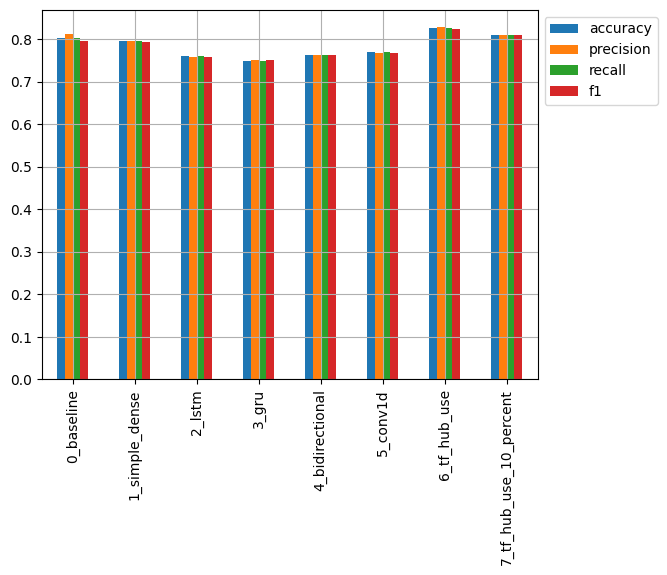

In [687]:
# Plot and campare all of the model results
all_model_results.plot(kind='bar').legend(bbox_to_anchor=(1,1))
#plt.legend(bbox_to_anchor=(1,1))
plt.grid()

<Axes: >

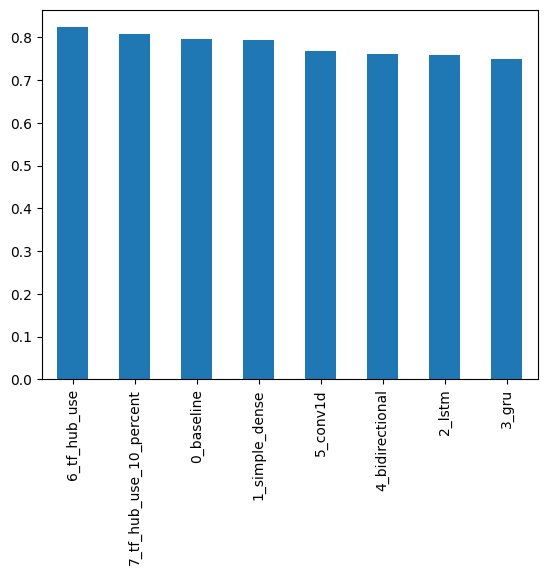

In [688]:
# Sort model results by f1-score
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar')

## Saving and loading a trained model

In [729]:
model_6.save('Saved_models/model_6')

INFO:tensorflow:Assets written to: Saved_models/model_6/assets


INFO:tensorflow:Assets written to: Saved_models/model_6/assets


In [730]:
loaded_model_6= tf_keras.models.load_model('Saved_models/model_6',
                                          custom_objects={'KerasLayer':hub.KerasLayer})

In [731]:
loaded_model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256863617 (979.86 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [732]:
loaded_model_6.evaluate(validation_text, validation_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.3947 - accuracy: 0.8255


[0.3946782052516937, 0.8254593014717102]

In [733]:
model_6_results_

{'accuracy': 0.8254593175853019,
 'precision': 0.8271948469872117,
 'recall': 0.8254593175853019,
 'f1': 0.8233027541992525}

## Finding the most wrong example

In [745]:
loaded_model_6_pred_probs= tf.squeeze(loaded_model_6.predict(validation_text))

24/24 [==============================] - 0s 7ms/step


In [746]:
loaded_model_6_preds= tf.squeeze(tf.round(loaded_model_6_pred_probs))

In [749]:
# Create dataframe with validation sentences and best performing model predictions label and it's probabilities
val_df= pd.DataFrame({'text':validation_text,
                     'target':validation_labels,
                     'pred':loaded_model_6_preds,
                     'pred_prob':loaded_model_6_pred_probs})

val_df.head()

,text,target,pred,pred_prob
0,'imagine an entire aisle dedicated to making p...,0,0.0,0.193933
1,@TexansDC @kylekrenek @Zepp1978 @Frobeus_NS Ne...,0,0.0,0.130870
2,Tunisia beach massacre linked to March terror ...,1,1.0,0.992886
3,#MeditationByMSG 45600 ppl got method of medit...,0,0.0,0.155252
4,Read ~ THE UNHEALED WOUNDS OF AN UNENDING CONF...,1,1.0,0.933062


In [758]:
val_df[val_df['target'] != val_df['pred']].shape

(133, 4)

In [764]:
most_wrong=val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10] # false posatives

,text,target,pred,pred_prob
668,FedEx will no longer transport bioterror patho...,0,1.0,0.934213
706,HereÛªs how media in Pakistan covered the cap...,0,1.0,0.933627
712,San Jose Mercury: Governor Brown allows parole...,0,1.0,0.924888
319,Over half of poll respondents worry nuclear di...,0,1.0,0.922938
97,County 911 Overload Prompts Use of Emergency P...,0,1.0,0.914921
34,@CNN the End of Times are upon us. Famine War ...,0,1.0,0.913202
363,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.908730
62,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.895238
579,Las Vegas in top 5 cities for red-light runnin...,0,1.0,0.864722
609,the MOFO in DC will leave our military unarmed...,0,1.0,0.862197


In [766]:
most_wrong[-10:] # false negatives

,text,target,pred,pred_prob
212,only had a car for not even a week and got in ...,1,0.0,0.103354
6,@SaintRobinho86 someone has to be at the botto...,1,0.0,0.097075
293,Skinny Jeans are Hazardous for Your Health! #s...,1,0.0,0.094280
741,The little girl next to me sees the spot light...,1,0.0,0.073258
466,Chick masturbates a guy until she gets explode...,1,0.0,0.070050
169,?? New Ladies Shoulder Tote #Handbag Faux Leat...,1,0.0,0.052196
537,Butt Trauma Extraordinaire,1,0.0,0.048303
747,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.040001
246,OMFG??\nDidnt expect Drag Me Down to be the fi...,1,0.0,0.039228
657,This is set to become a huge one month wonder....,1,0.0,0.036360


A reminder:

* `0` = Not a real diaster Tweet
- `1` = Real diaster Tweet


In [768]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
    _, text, target, pred, prob = row
    print(f"Target: {target},\nPred: {int(pred)}\nProb: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 0,
Pred: 1
Prob: 0.9342131018638611
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0,
Pred: 1
Prob: 0.9336274862289429
Text:
HereÛªs how media in Pakistan covered the capture of terrorist Mohammed Naved http://t.co/f7WqpCEkg2

----

Target: 0,
Pred: 1
Prob: 0.9248881936073303
Text:
San Jose Mercury: Governor Brown allows parole for California school bus hijacker  http://t.co/GpCeCp9kHv

----

Target: 0,
Pred: 1
Prob: 0.9229379296302795
Text:
Over half of poll respondents worry nuclear disaster fading from public consciousness http://t.co/YtnnnD631z ##fukushima

----

Target: 0,
Pred: 1
Prob: 0.9149210453033447
Text:
County 911 Overload Prompts Use of Emergency Plan During July 4 Celebrations http://t.co/HXTUPrA5bc http://t.co/DqxKJibbKy

----

Target: 0,
Pred: 1
Prob: 0.9132019877433777
Text:
@CNN the End of Times are upon us. Famine War Death Plague. The presence is growing stronger.

----

Target:

In [770]:
# Check the false negatives (model predicted 0 when should've been 1)
for row in most_wrong[-10:].itertuples(): # loop through the top 10 rows (change the index to view different rows)
    _, text, target, pred, prob = row
    print(f"Target: {target},\nPred: {int(pred)}\nProb: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

Target: 1,
Pred: 0
Prob: 0.10335428267717361
Text:
only had a car for not even a week and got in a fucking car accident .. Mfs can't fucking drive .

----

Target: 1,
Pred: 0
Prob: 0.09707539528608322
Text:
@SaintRobinho86 someone has to be at the bottom of every league. Tonight clearly demonstrated why the Lions are where they are - sunk!

----

Target: 1,
Pred: 0
Prob: 0.09427953511476517
Text:
Skinny Jeans are Hazardous for Your Health! #socialnews http://t.co/92Pk0HujD8

----

Target: 1,
Pred: 0
Prob: 0.07325778156518936
Text:
The little girl next to me sees the spot lights in the sky and screams ' mom! Look I see Angels in the sky!' ????

----

Target: 1,
Pred: 0
Prob: 0.07005015760660172
Text:
Chick masturbates a guy until she gets exploded on her face &gt; http://t.co/5QhoeHE9hf

----

Target: 1,
Pred: 0
Prob: 0.052195604890584946
Text:
?? New Ladies Shoulder Tote #Handbag Faux Leather Hobo Purse Cross Body Bag #Womens http://t.co/zujwUiomb3 http://t.co/iap4LwvqsW

----

Target:

In [772]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Making predictions on the test dataset

In [776]:
test_text= test_df['text'].to_list()
test_text[:5]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan']

In [800]:
test_samples= random.sample(test_text,10)
for sample in test_samples:
    pred_prob= tf.squeeze(loaded_model_6.predict([sample]))
    pred= tf.round(pred_prob)
    print(f'pred: {int(pred)}\nprob: {pred_prob}\nsentence:\n {sample}\n\n')

1/1 [==============================] - 0s 69ms/step
pred: 0
prob: 0.08552152663469315
sentence:
 Aramis will crush 1 pitch strop


1/1 [==============================] - 0s 49ms/step
pred: 0
prob: 0.2449064552783966
sentence:
 ÛÏTell Shinichi Kudo that IÛªm giving him 3 minutes to enjoy it..Û -Moriya Teiji famous architect from The Time Bombed Skyscraper


1/1 [==============================] - 0s 52ms/step
pred: 0
prob: 0.15297985076904297
sentence:
 'Failure doesnÛªt exist. ItÛªs only a change of direction' - Alejandro Jodorowsky (via buildings-on-fire) http://t.co/ByMVemW4xF


1/1 [==============================] - 0s 42ms/step
pred: 0
prob: 0.10170187056064606
sentence:
 @justinbieber @ArianaGrande IMA SCREAMING HSBFUCKJSJ


1/1 [==============================] - 0s 37ms/step
pred: 0
prob: 0.46688851714134216
sentence:
 Cyclone hits Skye  http://t.co/QZYeRMrQtW http://t.co/N5AI9pQNjg


1/1 [==============================] - 0s 40ms/step
pred: 0
prob: 0.23958247900009155
sente

In [785]:
len(test_samples)

10

## The speed/score tradeoff

In [802]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
    """
    Times how long a model takes to make predictions on samples.

    Args:
    ----
    model = a trained model
    sample = a list of samples

    Returns:
    ----
    total_time = total elapsed time for model to make predictions on samples
    time_per_pred = time in seconds per single sample
    """
    start_time= time.perf_counter()
    model.predict(samples)
    total_time= time.perf_counter() - start_time
    
    time_per_pred=total_time/len(samples)
    return total_time, time_per_pred

In [804]:
model_6_total_pred_time, model_6_time_per_pred= pred_timer(loaded_model_6, validation_text)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 8ms/step


(0.30845764800324105, 0.00040480006299637935)

In [805]:
baseline_total_pred_time, baseline_time_per_pred= pred_timer(model_0, validation_text)
baseline_total_pred_time, baseline_time_per_pred

(0.07755053100117948, 0.00010177235039524866)

In [807]:
model_6_total_pred_time/baseline_total_pred_time,  model_6_time_per_pred/baseline_time_per_pred

(3.977505299074608, 3.977505299074608)

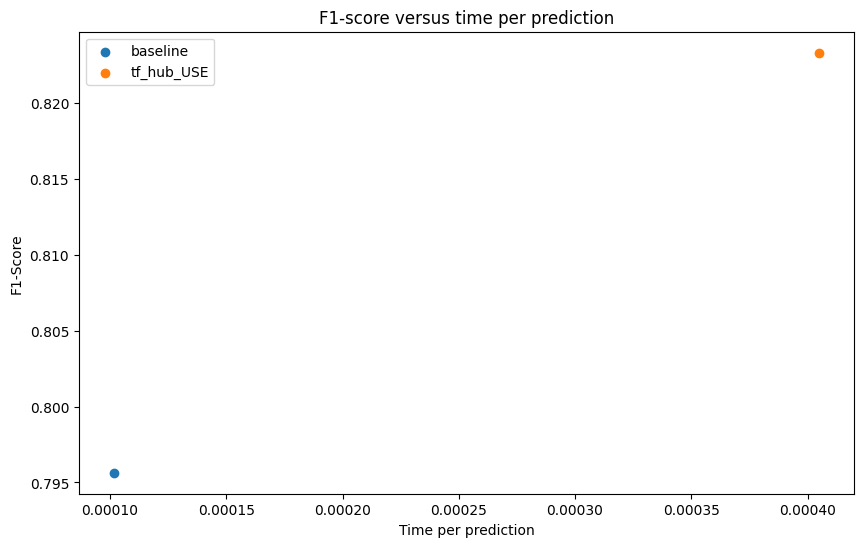

In [827]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(baseline_time_per_pred, model_0_results_['f1'], label='baseline')
plt.scatter(model_6_time_per_pred, model_6_results_['f1'], label='tf_hub_USE')
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");
